In [10]:
import gc
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from simple_linear_regr import (
    TYPE_FLOAT,
    TYPE_INT,
    add_bias,
    SimpleLinearRegression
)
from simple_linear_regr_utils import (
    generate_data, 
    evaluate
)
from benchmark import (
    benchmark
)

# Data

In [3]:
X_train, y_train, X_test, y_test = generate_data()

X_train = add_bias(X_train)
y_train = y_train.astype(TYPE_FLOAT)
y_test = y_test.astype(TYPE_FLOAT)

print(f"X_train.shape {X_train.shape} y_train.shape {y_train.shape}")

# Training Samples: 422; # Test samples: 20;
X_train.shape (422, 2) y_train.shape (422, 1)


# Gradient Descent Formula

To avoid two vectorized calculation for ```W``` and ```b```, integrate ```b``` into ```W```.

<img src="../image/gradient_descent.jpg" align="left"/>

# Integrate intercept (bias) into slope coefficients

<img src="../image/intersect_to_slope.jpg" align="left" width=500/>

# Training

In [4]:
model = SimpleLinearRegression()
model.fit(X_train,y_train)

Initial Loss: -154.14121401093138
Iteration 0, Loss: -138.7269886255691
Iteration 100, Loss: -0.0027000136649673045
Iteration 200, Loss: 0.0009626350855769239
Iteration 300, Loss: 0.000941173004525897
Iteration 400, Loss: 0.0009200958803781134
Iteration 500, Loss: 0.0008994907659247708
Iteration 600, Loss: 0.0008793470933854408
Iteration 700, Loss: 0.0008596545288566126
Iteration 800, Loss: 0.0008404029701227778
Iteration 900, Loss: 0.0008215825409099153
Iteration 1000, Loss: 0.000803183586413514
Iteration 1100, Loss: 0.0007851966678504851
Iteration 1200, Loss: 0.0007676125578144344
Iteration 1300, Loss: 0.0007504222356762291
Iteration 1400, Loss: 0.0007336168827407619
Iteration 1500, Loss: 0.0007171878777691987
Iteration 1600, Loss: 0.000701126792642448
Iteration 1700, Loss: 0.0006854253879637895
Iteration 1800, Loss: 0.0006700756087925086
Iteration 1900, Loss: 0.0006550695807541196
Iteration 2000, Loss: 0.0006403996056305594
Iteration 2100, Loss: 0.0006260581577035573
Iteration 2200,

# Evaluation

Slope: [[152.93374585 906.83553627]]
Mean squared error: 2585.94
Coefficient of determination: 0.46


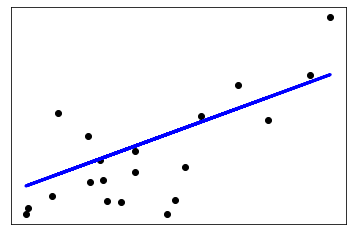

****** Success ******


True

In [5]:
predicted = model.predict(X_test)
evaluate(model, X_test, y_test, predicted)

# Save model

In [6]:
model.save("../model/model.npy")

# Load model & Re-evaluate

Slope: [[152.93375396 906.81843181]]
Mean squared error: 2585.94
Coefficient of determination: 0.46


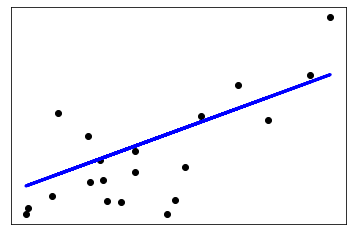

****** Success ******


True

In [11]:
del model
gc.collect()

model = SimpleLinearRegression()
model.load("../model/model.npy")
evaluate(model, X_test, y_test, predicted)

---
# Bench Mark

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


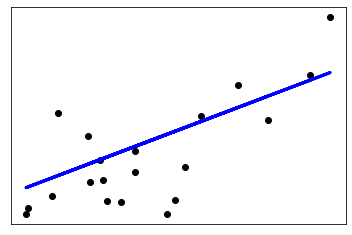

0.47257544798227147

In [8]:
benchmark()